In [14]:
import pandas as pd

In [15]:
df=pd.read_excel('农林轻工2024area.xlsx')
df

symbol shortname  year  week_of_year  week_start_day  sum_amount  \
0       2103      广博股份  2021            53        20201228     4814.52   
1       2103      广博股份  2021             1        20210104    12900.46   
2       2103      广博股份  2021             2        20210111     9314.18   
3       2103      广博股份  2021             3        20210118     8720.39   
4       2103      广博股份  2021             4        20210125     8918.70   
...      ...       ...   ...           ...             ...         ...   
1194  832419      路斯股份  2023            49        20231204     2841.08   
1195  832419      路斯股份  2023            50        20231211     4142.67   
1196  832419      路斯股份  2023            51        20231218     4645.94   
1197  832419      路斯股份  2023            52        20231225     3038.03   
1198  832419      路斯股份  2024             1        20240101     2531.32   

      sum_quantity  sum_bill  
0              832       665  
1             1763      1020  
2             1424       982  
3             1352       975  
4             1380      1015  
...            ...       ...  
1194           146       118  
1195           208       166  
1196           212       162  
1197           138       129  
1198           129       115  

[1199 rows x 8 columns]

In [16]:
df.columns

Index(['symbol', 'shortname', 'year', 'week_of_year', 'week_start_day',
       'sum_amount', 'sum_quantity', 'sum_bill'],
      dtype='object')

# 以周为单位聚合

In [17]:
data=df.groupby(['symbol', 'week_start_day']).agg({
    'shortname': 'first',
    'week_of_year': 'first',
    'sum_amount': 'sum',
    'sum_quantity': 'sum',
    'sum_bill': 'sum'
}).reset_index().sort_values(by=['symbol', 'week_start_day'], ascending=True)
data['week_start_day'] = pd.to_datetime(data['week_start_day'], format='%Y%m%d')
data

symbol week_start_day shortname  week_of_year  sum_amount  sum_quantity  \
0       2103     2020-12-28      广博股份            53     4814.52           832   
1       2103     2021-01-04      广博股份             1    12900.46          1763   
2       2103     2021-01-11      广博股份             2     9314.18          1424   
3       2103     2021-01-18      广博股份             3     8720.39          1352   
4       2103     2021-01-25      广博股份             4     8918.70          1380   
...      ...            ...       ...           ...         ...           ...   
1179  832419     2023-12-04      路斯股份            49     2841.08           146   
1180  832419     2023-12-11      路斯股份            50     4142.67           208   
1181  832419     2023-12-18      路斯股份            51     4645.94           212   
1182  832419     2023-12-25      路斯股份            52     3038.03           138   
1183  832419     2024-01-01      路斯股份             1     2531.32           129   

      sum_bill  
0          665  
1         1020  
2          982  
3          975  
4         1015  
...        ...  
1179       118  
1180       166  
1181       162  
1182       129  
1183       115  

[1184 rows x 7 columns]

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties 
font_set = FontProperties(fname=r"c:\windows\fonts\simsun.ttc", size=15)#字体
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
#设置中文字体
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# 筛选有158周数据的企业

In [19]:
all_dates = data['week_start_day'].unique()
symbols = data['symbol'].unique()
symbols

array([  2103,   2301,   2862,   2891, 300703, 603398, 603899, 832419],
      dtype=int64)

In [20]:
for symbol in symbols:
    symbol_data = data[data['symbol'] == symbol]
    symbol_dates = symbol_data['week_start_day']
    missing_num = len(set(all_dates) - set(symbol_dates))
    if missing_num!=0:
        symbols=np.delete(symbols, np.where(symbols==symbol))
symbols

array([  2103,   2301,   2891, 603899, 832419], dtype=int64)

In [21]:
data

symbol week_start_day shortname  week_of_year  sum_amount  sum_quantity  \
0       2103     2020-12-28      广博股份            53     4814.52           832   
1       2103     2021-01-04      广博股份             1    12900.46          1763   
2       2103     2021-01-11      广博股份             2     9314.18          1424   
3       2103     2021-01-18      广博股份             3     8720.39          1352   
4       2103     2021-01-25      广博股份             4     8918.70          1380   
...      ...            ...       ...           ...         ...           ...   
1179  832419     2023-12-04      路斯股份            49     2841.08           146   
1180  832419     2023-12-11      路斯股份            50     4142.67           208   
1181  832419     2023-12-18      路斯股份            51     4645.94           212   
1182  832419     2023-12-25      路斯股份            52     3038.03           138   
1183  832419     2024-01-01      路斯股份             1     2531.32           129   

      sum_bill  
0          665  
1         1020  
2          982  
3          975  
4         1015  
...        ...  
1179       118  
1180       166  
1181       162  
1182       129  
1183       115  

[1184 rows x 7 columns]

In [22]:
df=data[data['symbol'].isin(symbols)]
df

symbol week_start_day shortname  week_of_year  sum_amount  sum_quantity  \
0       2103     2020-12-28      广博股份            53     4814.52           832   
1       2103     2021-01-04      广博股份             1    12900.46          1763   
2       2103     2021-01-11      广博股份             2     9314.18          1424   
3       2103     2021-01-18      广博股份             3     8720.39          1352   
4       2103     2021-01-25      广博股份             4     8918.70          1380   
...      ...            ...       ...           ...         ...           ...   
1179  832419     2023-12-04      路斯股份            49     2841.08           146   
1180  832419     2023-12-11      路斯股份            50     4142.67           208   
1181  832419     2023-12-18      路斯股份            51     4645.94           212   
1182  832419     2023-12-25      路斯股份            52     3038.03           138   
1183  832419     2024-01-01      路斯股份             1     2531.32           129   

      sum_bill  
0          665  
1         1020  
2          982  
3          975  
4         1015  
...        ...  
1179       118  
1180       166  
1181       162  
1182       129  
1183       115  

[790 rows x 7 columns]

# 原序列画图

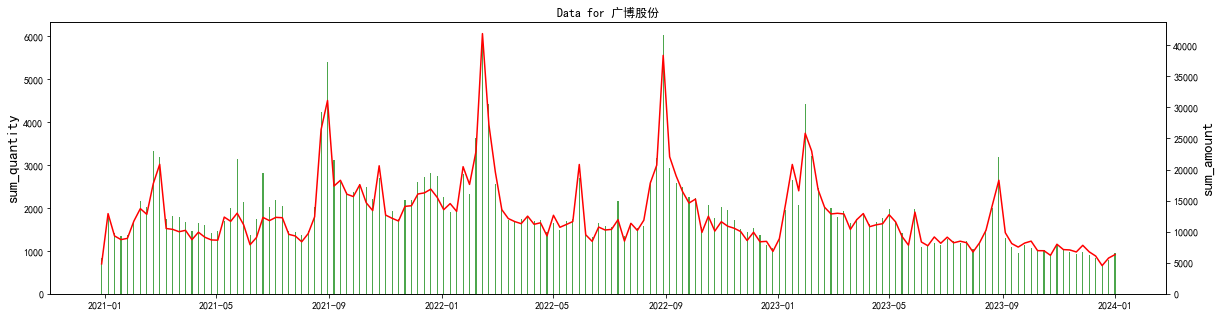

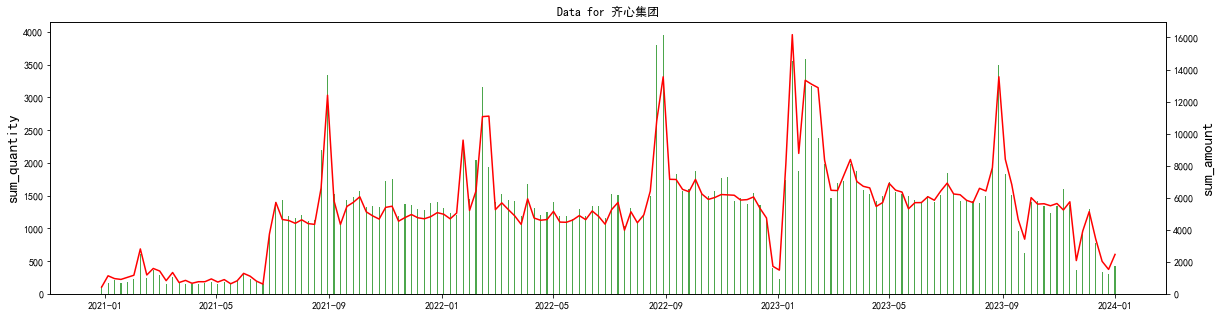

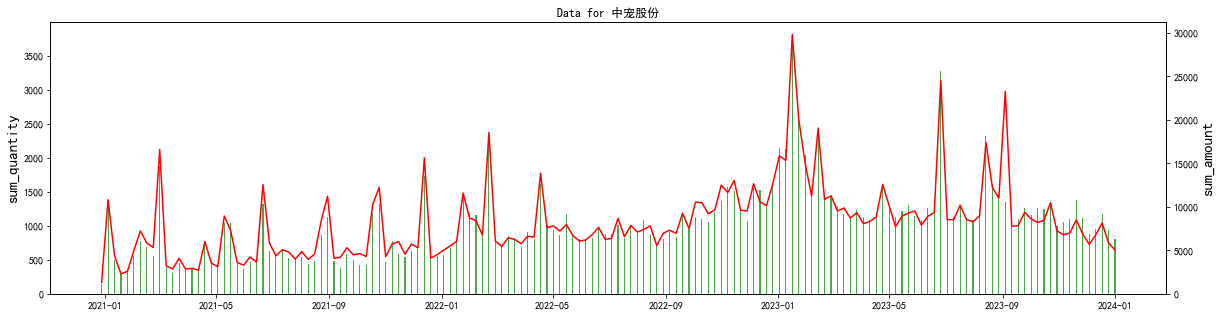

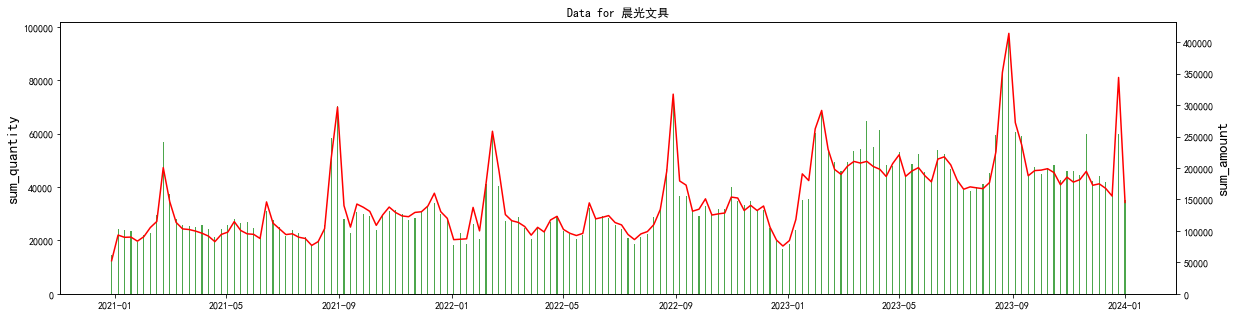

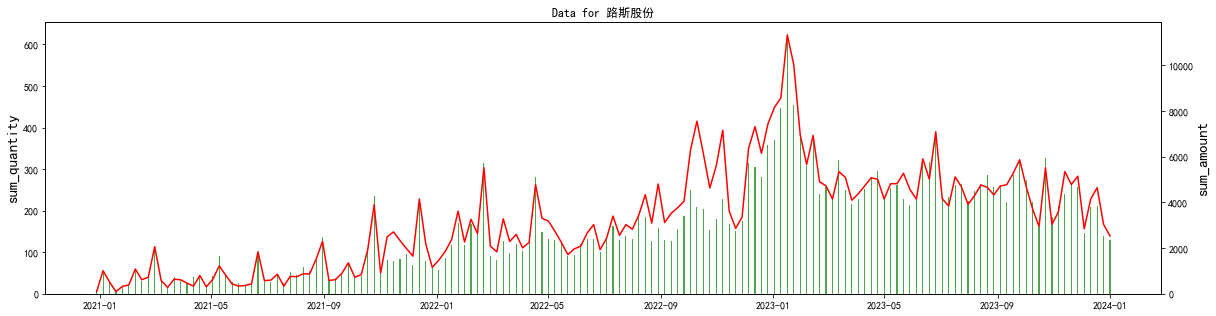

In [23]:
import seaborn as sns
shortnames = df['shortname'].unique()

for shortname in shortnames:
    symbol_data = df[df['shortname'] == shortname]
    plt.rcParams['figure.figsize'] = (20,5)
    fig = plt.figure()
    #画柱形图
    ax1 = fig.add_subplot(111)
    ax1.bar(symbol_data.to_numpy().T[1], symbol_data.to_numpy().T[5],label='sum_quantity',alpha=.7,color='g',width=1.2)
    ax1.set_ylabel('sum_quantity',fontsize='15')
    #ax1.set_title('数据统计',fontsize='20')
    #画折线图
    ax2 = ax1.twinx() #组合图必须加这个
    ax2.plot(symbol_data.to_numpy().T[1], symbol_data.to_numpy().T[4], label='sum_amount',color= 'r')
    ax2.set_ylabel('sum_amount',fontsize='15')
    ax2.set_ylim(bottom=0)
#     plt.subplots_adjust(wspace=0.3) 
    plt.title(f'Data for {shortname}')
    plt.xlabel('week_start_day')
    plt.xticks(rotation=45)
    plt.show()
    

# 添加门店信息

In [24]:
shop=pd.read_excel('门店个数.xlsx')
shop

week_start_day  count_ep  count_shop    sum_area
0       2020-12-28        61        1959  1785231.25
1       2021-01-04        63        1984  1834909.25
2       2021-01-11        62        1989  1844122.25
3       2021-01-18        62        2001  1855153.25
4       2021-01-25        62        2013  1861787.25
..             ...       ...         ...         ...
153     2023-12-04        81        2723  2810535.38
154     2023-12-11        80        2701  2781926.37
155     2023-12-18        77        2663  2804205.48
156     2023-12-25        72        2622  2698502.46
157     2024-01-01        72        2612  2716393.10

[158 rows x 4 columns]

In [25]:
df_avg=pd.merge(left=df, right=shop, left_on='week_start_day', right_on='week_start_day', how='left')

df_avg['area_sum_amount']=df_avg['sum_amount']/df_avg['sum_area']
df_avg['area_sum_quantity']=df_avg['sum_quantity']/df_avg['sum_area']
df_avg['area_sum_bill']=df_avg['sum_bill']/df_avg['sum_area']
df_avg

symbol week_start_day shortname  week_of_year  sum_amount  sum_quantity  \
0      2103     2020-12-28      广博股份            53     4814.52           832   
1      2103     2021-01-04      广博股份             1    12900.46          1763   
2      2103     2021-01-11      广博股份             2     9314.18          1424   
3      2103     2021-01-18      广博股份             3     8720.39          1352   
4      2103     2021-01-25      广博股份             4     8918.70          1380   
..      ...            ...       ...           ...         ...           ...   
785  832419     2023-12-04      路斯股份            49     2841.08           146   
786  832419     2023-12-11      路斯股份            50     4142.67           208   
787  832419     2023-12-18      路斯股份            51     4645.94           212   
788  832419     2023-12-25      路斯股份            52     3038.03           138   
789  832419     2024-01-01      路斯股份             1     2531.32           129   

     sum_bill  count_ep  count_shop    sum_area  area_sum_amount  \
0         665        61        1959  1785231.25         0.002697   
1        1020        63        1984  1834909.25         0.007031   
2         982        62        1989  1844122.25         0.005051   
3         975        62        2001  1855153.25         0.004701   
4        1015        62        2013  1861787.25         0.004790   
..        ...       ...         ...         ...              ...   
785       118        81        2723  2810535.38         0.001011   
786       166        80        2701  2781926.37         0.001489   
787       162        77        2663  2804205.48         0.001657   
788       129        72        2622  2698502.46         0.001126   
789       115        72        2612  2716393.10         0.000932   

     area_sum_quantity  area_sum_bill  
0             0.000466       0.000373  
1             0.000961       0.000556  
2             0.000772       0.000533  
3             0.000729       0.000526  
4             0.000741       0.000545  
..                 ...            ...  
785           0.000052       0.000042  
786           0.000075       0.000060  
787           0.000076       0.000058  
788           0.000051       0.000048  
789           0.000047       0.000042  

[790 rows x 13 columns]

In [26]:
df_avg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 790 entries, 0 to 789
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   symbol             790 non-null    int64         
 1   week_start_day     790 non-null    datetime64[ns]
 2   shortname          790 non-null    object        
 3   week_of_year       790 non-null    int64         
 4   sum_amount         790 non-null    float64       
 5   sum_quantity       790 non-null    int64         
 6   sum_bill           790 non-null    int64         
 7   count_ep           790 non-null    int64         
 8   count_shop         790 non-null    int64         
 9   sum_area           790 non-null    float64       
 10  area_sum_amount    790 non-null    float64       
 11  area_sum_quantity  790 non-null    float64       
 12  area_sum_bill      790 non-null    float64       
dtypes: datetime64[ns](1), float64(5), int64(6), object(1)
memory usag

# 环比

In [27]:
df_avg

symbol week_start_day shortname  week_of_year  sum_amount  sum_quantity  \
0      2103     2020-12-28      广博股份            53     4814.52           832   
1      2103     2021-01-04      广博股份             1    12900.46          1763   
2      2103     2021-01-11      广博股份             2     9314.18          1424   
3      2103     2021-01-18      广博股份             3     8720.39          1352   
4      2103     2021-01-25      广博股份             4     8918.70          1380   
..      ...            ...       ...           ...         ...           ...   
785  832419     2023-12-04      路斯股份            49     2841.08           146   
786  832419     2023-12-11      路斯股份            50     4142.67           208   
787  832419     2023-12-18      路斯股份            51     4645.94           212   
788  832419     2023-12-25      路斯股份            52     3038.03           138   
789  832419     2024-01-01      路斯股份             1     2531.32           129   

     sum_bill  count_ep  count_shop    sum_area  area_sum_amount  \
0         665        61        1959  1785231.25         0.002697   
1        1020        63        1984  1834909.25         0.007031   
2         982        62        1989  1844122.25         0.005051   
3         975        62        2001  1855153.25         0.004701   
4        1015        62        2013  1861787.25         0.004790   
..        ...       ...         ...         ...              ...   
785       118        81        2723  2810535.38         0.001011   
786       166        80        2701  2781926.37         0.001489   
787       162        77        2663  2804205.48         0.001657   
788       129        72        2622  2698502.46         0.001126   
789       115        72        2612  2716393.10         0.000932   

     area_sum_quantity  area_sum_bill  
0             0.000466       0.000373  
1             0.000961       0.000556  
2             0.000772       0.000533  
3             0.000729       0.000526  
4             0.000741       0.000545  
..                 ...            ...  
785           0.000052       0.000042  
786           0.000075       0.000060  
787           0.000076       0.000058  
788           0.000051       0.000048  
789           0.000047       0.000042  

[790 rows x 13 columns]

In [28]:
def ratio(df,list_column):
    for column in list_column:
        column_name=column+'_ratio'
        df[column_name]=(df[column]-df[column].shift(1))/df[column].shift(1)

In [29]:
shortnames = df_avg['shortname'].unique()
data_final=pd.DataFrame()
for shortname in shortnames:
    symbol_data = df_avg[df_avg['shortname'] == shortname]
    ratio(symbol_data,['area_sum_amount', 'area_sum_quantity', 'area_sum_bill'])
    symbol_data=symbol_data.dropna()
    data_final=pd.concat([data_final, symbol_data], ignore_index=True)
data_final

symbol week_start_day shortname  week_of_year  sum_amount  sum_quantity  \
0      2103     2021-01-04      广博股份             1    12900.46          1763   
1      2103     2021-01-11      广博股份             2     9314.18          1424   
2      2103     2021-01-18      广博股份             3     8720.39          1352   
3      2103     2021-01-25      广博股份             4     8918.70          1380   
4      2103     2021-02-01      广博股份             5    11700.10          1650   
..      ...            ...       ...           ...         ...           ...   
780  832419     2023-12-04      路斯股份            49     2841.08           146   
781  832419     2023-12-11      路斯股份            50     4142.67           208   
782  832419     2023-12-18      路斯股份            51     4645.94           212   
783  832419     2023-12-25      路斯股份            52     3038.03           138   
784  832419     2024-01-01      路斯股份             1     2531.32           129   

     sum_bill  count_ep  count_shop    sum_area  area_sum_amount  \
0        1020        63        1984  1834909.25         0.007031   
1         982        62        1989  1844122.25         0.005051   
2         975        62        2001  1855153.25         0.004701   
3        1015        62        2013  1861787.25         0.004790   
4        1269        62        1979  1825671.67         0.006409   
..        ...       ...         ...         ...              ...   
780       118        81        2723  2810535.38         0.001011   
781       166        80        2701  2781926.37         0.001489   
782       162        77        2663  2804205.48         0.001657   
783       129        72        2622  2698502.46         0.001126   
784       115        72        2612  2716393.10         0.000932   

     area_sum_quantity  area_sum_bill  area_sum_amount_ratio  \
0             0.000961       0.000556               1.606946   
1             0.000772       0.000533              -0.281603   
2             0.000729       0.000526              -0.069318   
3             0.000741       0.000545               0.019097   
4             0.000904       0.000695               0.337813   
..                 ...            ...                    ...   
780           0.000052       0.000042              -0.415867   
781           0.000075       0.000060               0.473127   
782           0.000076       0.000058               0.112574   
783           0.000051       0.000048              -0.320475   
784           0.000047       0.000042              -0.172277   

     area_sum_quantity_ratio  area_sum_bill_ratio  
0                   1.061621             0.492308  
1                  -0.196321            -0.042065  
2                  -0.056207            -0.013032  
3                   0.017073             0.037316  
4                   0.219305             0.274979  
..                       ...                  ...  
780                -0.396605            -0.388015  
781                 0.439309             0.421247  
782                 0.011133            -0.031850  
783                -0.323559            -0.172512  
784                -0.071374            -0.114399  

[785 rows x 16 columns]

In [30]:
data_final.to_excel('农林轻工周度_avg.xlsx',index=False)

# 平稳性检验

In [31]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller
def adf_result(data):
    # 对时间序列进行ADF测试
    result = adfuller(data)
    # 输出结果转化为DataFrame
    output_results = pd.DataFrame({
        'ADF Statistic': [result[0]],
        'P-Value': [result[1]],
        'Lags': [result[2]],
        'Observations': [result[3]]
    })

    # 添加临界值
    critical_values = result[4]
    for key, value in critical_values.items():
        output_results[f'{key}% Critical Value'] = value
    
    return output_results

In [32]:
data_final.columns

Index(['symbol', 'week_start_day', 'shortname', 'week_of_year', 'sum_amount',
       'sum_quantity', 'sum_bill', 'count_ep', 'count_shop', 'sum_area',
       'area_sum_amount', 'area_sum_quantity', 'area_sum_bill',
       'area_sum_amount_ratio', 'area_sum_quantity_ratio',
       'area_sum_bill_ratio'],
      dtype='object')

In [35]:
shortnames = data_final['shortname'].unique()
name=[]
for i in ['sum_amount','sum_quantity', 'sum_bill', 
       'area_sum_amount', 'area_sum_quantity', 'area_sum_bill',
     'area_sum_amount_ratio', 'area_sum_quantity_ratio', 'area_sum_bill_ratio']:
    print(i)
    
    adf_data=pd.DataFrame()
    for shortname in shortnames:     
        symbol_data = data_final[data_final['shortname'] == shortname]
        result=adf_result(symbol_data[i])
        result['name']=shortname
        adf_data=pd.concat([adf_data, result], ignore_index=True)
    print(adf_data)
    # 筛选出'P-Value'小于0.05的行
    filtered_data = adf_data[adf_data['P-Value'] < 0.05]
    # 获取筛选后的'name'列
    names = filtered_data['name'].to_list()
    name.append(names)
    print("------------------------------------------------------------")
    print('\n')

sum_amount
   ADF Statistic   P-Value  Lags  Observations  1%% Critical Value  \
0      -5.224431  0.000008     0           156           -3.472979   
1      -4.727858  0.000075     0           156           -3.472979   
2      -1.947279  0.310157    10           146           -3.475953   
3      -4.922466  0.000032     0           156           -3.472979   
4      -1.425210  0.570132     9           147           -3.475637   

   5%% Critical Value  10%% Critical Value  name  
0           -2.880252            -2.576747  广博股份  
1           -2.880252            -2.576747  齐心集团  
2           -2.881548            -2.577439  中宠股份  
3           -2.880252            -2.576747  晨光文具  
4           -2.881410            -2.577365  路斯股份  
------------------------------------------------------------


sum_quantity
   ADF Statistic   P-Value  Lags  Observations  1%% Critical Value  \
0      -5.434230  0.000003     0           156           -3.472979   
1      -4.974870  0.000025     0           156

In [36]:
# 初始化一个空集合，用于存储所有子列表的交集元素
common_elements = set()

# 遍历所有子列表
for sublist in name:
    # 对每个子列表进行去重，转换为集合
    sublist_set = set(sublist)
    # 将当前子列表的元素添加到交集集合中
    common_elements |= sublist_set

# 交集集合中的元素就是每个子列表都包含的元素
common_elements = common_elements.intersection(*name)

print(common_elements)

{'广博股份', '晨光文具', '齐心集团'}


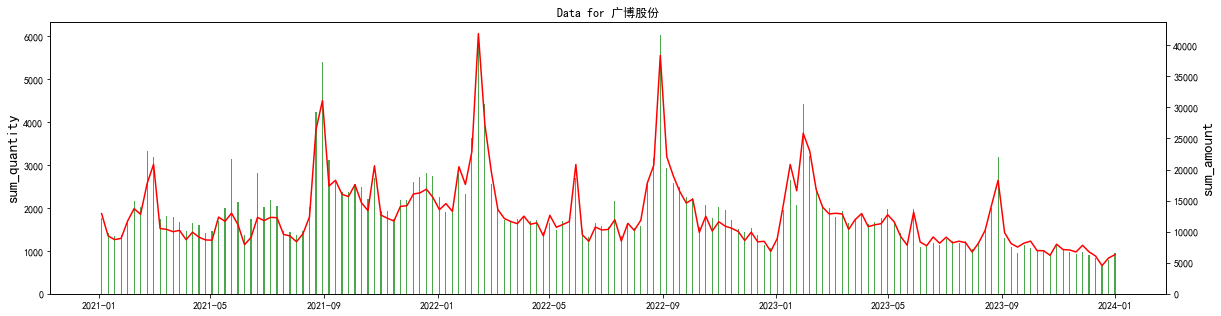

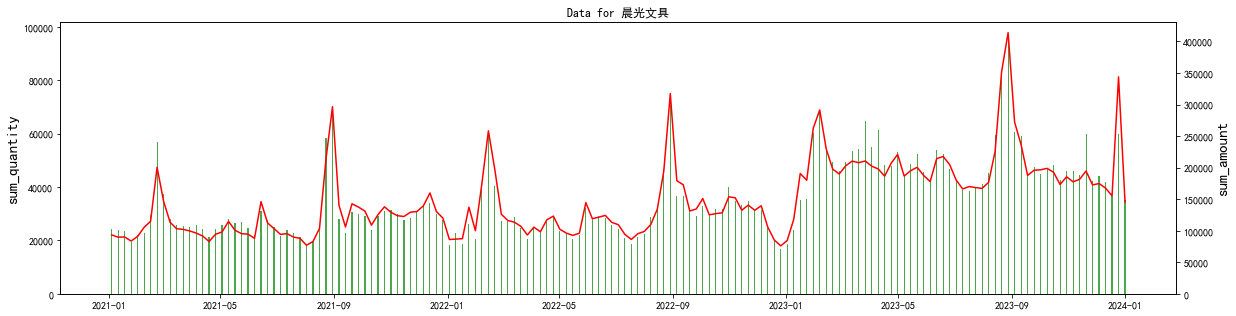

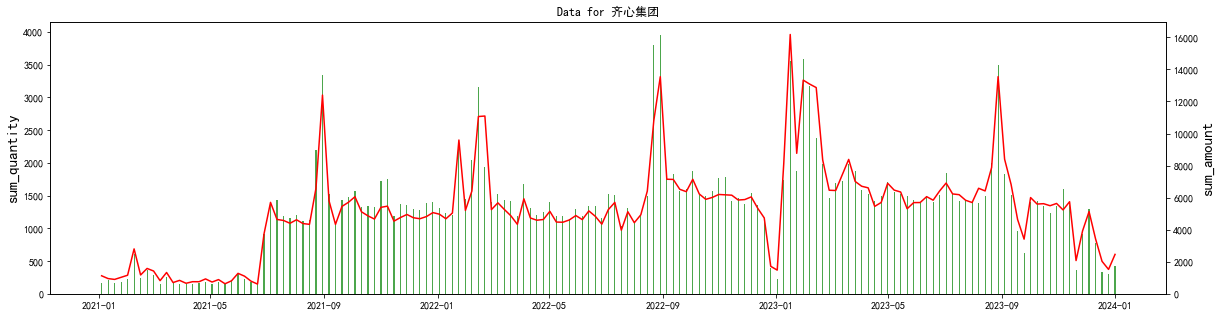

In [37]:
for shortname in common_elements:
    symbol_data = data_final[data_final['shortname'] == shortname]
    plt.rcParams['figure.figsize'] = (20,5)
    fig = plt.figure()
    #画柱形图
    ax1 = fig.add_subplot(111)
    ax1.bar(symbol_data.to_numpy().T[1], symbol_data.to_numpy().T[5],label='sum_quantity',alpha=.7,color='g',width=1.2)
    ax1.set_ylabel('sum_quantity',fontsize='15')
    #ax1.set_title('数据统计',fontsize='20')
    #画折线图
    ax2 = ax1.twinx() #组合图必须加这个
    ax2.plot(symbol_data.to_numpy().T[1], symbol_data.to_numpy().T[4], label='sum_amount',color= 'r')
    ax2.set_ylabel('sum_amount',fontsize='15')
    ax2.set_ylim(bottom=0)
#     plt.subplots_adjust(wspace=0.3) 
    plt.title(f'Data for {shortname}')
    plt.xlabel('week_start_day')
    plt.xticks(rotation=45)
    plt.show()